### Auther : Hicran Arnold <br> Title: Heart Failure Prediction Using Logistic Regression Machine Learning Algorithms<br> Date:04/27/2022

### Table Of Contents 
**1. Abstract**<br>
**2. Introduction**<br>
**3. Python Libraries**<br>
**4. Exploring and Cleaning the Data**<br>
**5. Transforming the Categorical Variables: Creatinging Dummy Variables**<br>
**6. Split Training and Test Datasets**<br>
**7- Creating Logistic Regression Model and Fitting our Data**<br>
**9- Feature Selection Model Improvement**<br>
**10-Final Model with Selected Parameters**<br>
**11- Evaluate the Model**<br>

---

### 1- ABSTRACT
Many of us are familiar with heart desiase and stroke. According World Health Organization [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death#:~:text=Since%202000%2C%20the%20largest%20increase,6%25%20of%20total%20deaths%20respectively) heart disease, stroke is the number one cause of death and stroke is the second and there is a need for research. The heart failure prediction data set provides valuable information about heart failure parameters.  In my research, I will use logistic regression to predict whether a patient has a heart failure or not using Heart Failure Prediction Dataset.

---

### 2- INTRODUCTION
**2.1 Information About The Data Set**
- Original Data Set and Source Info: [ Retrieved from fedesoriano. Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv) 
- 12 Attributes
- 918 observations 

**2.2 Atribute(feature) Information**
  - Age: age of the patient [years]
  - Sex: sex of the patient [M: Male, F: Female]
  - ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
  - RestingBP: resting blood pressure [mm Hg]
  - Cholesterol: serum cholesterol [mm/dl]
  - FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
  - RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
  - MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
  - ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
  - Oldpeak: oldpeak = ST [Numeric value measured in depression]
  - ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
  - HeartDisease: output class [1: heart disease, 0: Normal]

---

### 3- Import Import Python Libraries
Below are the list of python libraries that we need for this project

In [43]:
# for data processing
import pandas as pd
import numpy as np
# for vizulazations
import matplotlib.pyplot as plt
import seaborn as sns
# scalling the data for the machine learning model
from sklearn.preprocessing import StandardScaler
# machine learning libraries for data modeling
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score,plot_roc_curve
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

---

### 4. Exploring and Cleaning the Data

**4.1 Loading the raw data**

In [44]:
data_heart = pd.read_csv("heart.csv")
print("onservation size: ", len(data_heart))
data_heart.head()

onservation size:  918


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**4.2 Remove duplicate or irrelevant observations** <br>
In this step I will be checking to see if there are any dublicates or irrelavant observations.
In our data set we have no dublicates.

In [45]:
# this checks to see if df contains any dublicates
data_heart.duplicated().sum() 

0

**4.3 Checking for missing data**

Checking for null and NA values: We have no null values. We got zero for each features. 

In [46]:
print(data_heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


**4.4 Investigating all the elements whithin each Feature**
In this section, we will check the data to see if there is any variable that looks different than what is listed on the data source website. I did not see any abnormality. 

In [47]:
feature_no =0
for column in data_heart:
    unique_values = np.unique(data_heart[column])
    nr_values = len(unique_values)# number of unique_values
    feature_no+=1 # countin feature to make sure we screen all of the features
    print("Feature: ",feature_no, column)
    if nr_values <= 10: # if the number of values are less than 10 
        print("The number of unquie values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of unquie values for feature {} is: {}".format(column, nr_values)) # only print the number of values
    print("*********************************")

Feature:  1 Age
The number of unquie values for feature Age is: 50
*********************************
Feature:  2 Sex
The number of unquie values for feature Sex is: 2 -- ['F' 'M']
*********************************
Feature:  3 ChestPainType
The number of unquie values for feature ChestPainType is: 4 -- ['ASY' 'ATA' 'NAP' 'TA']
*********************************
Feature:  4 RestingBP
The number of unquie values for feature RestingBP is: 67
*********************************
Feature:  5 Cholesterol
The number of unquie values for feature Cholesterol is: 222
*********************************
Feature:  6 FastingBS
The number of unquie values for feature FastingBS is: 2 -- [0 1]
*********************************
Feature:  7 RestingECG
The number of unquie values for feature RestingECG is: 3 -- ['LVH' 'Normal' 'ST']
*********************************
Feature:  8 MaxHR
The number of unquie values for feature MaxHR is: 119
*********************************
Feature:  9 ExerciseAngina
The number of 

### **4.5 Summarizing and Vizulation Data** <br>
for this step we need split our data two as categorical and numerical

In [48]:
categ_data =[]
numeric_data = []
binary_data = []
for column in data_heart:
    unique_values = np.unique(data_heart[column])
    nr_values = len(unique_values)
    if data_heart.dtypes[column] == "object":
        categ_data.append(column)
    else:
        if nr_values == 2:
            binary_data.append(column)
        else:
            numeric_data.append(column)
print("categorical data")    
print(categ_data)
print("numeric data")
print(numeric_data)
print("binary data ( numeric 0 and 1)")
print(binary_data)

categorical data
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numeric data
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
binary data ( numeric 0 and 1)
['FastingBS', 'HeartDisease']


**4.5a numerical data summary**

Now we can vizulazi our numeric data and check to see if there is any skweness and any linear relationship in between our features. Below plot indicates that we do not have any high correlation in our data. However we see some skewnees in oldpeak and chelestrol

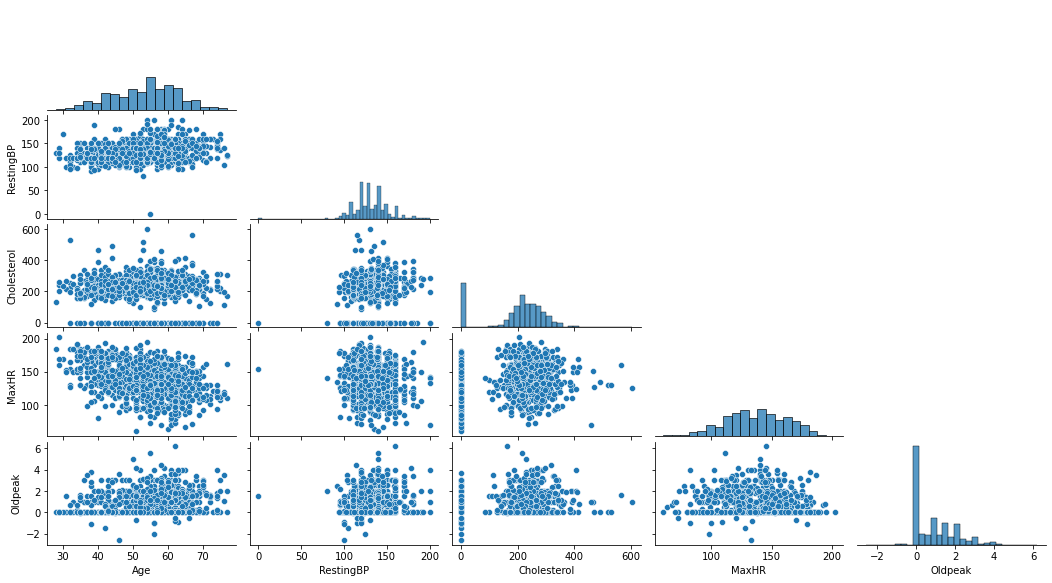

In [49]:
p = sns.pairplot(data_heart.loc[ : ,numeric_data], corner=True)
plt.gcf().set_size_inches(15, 8)

The below pairplot show us values by heart disase feature

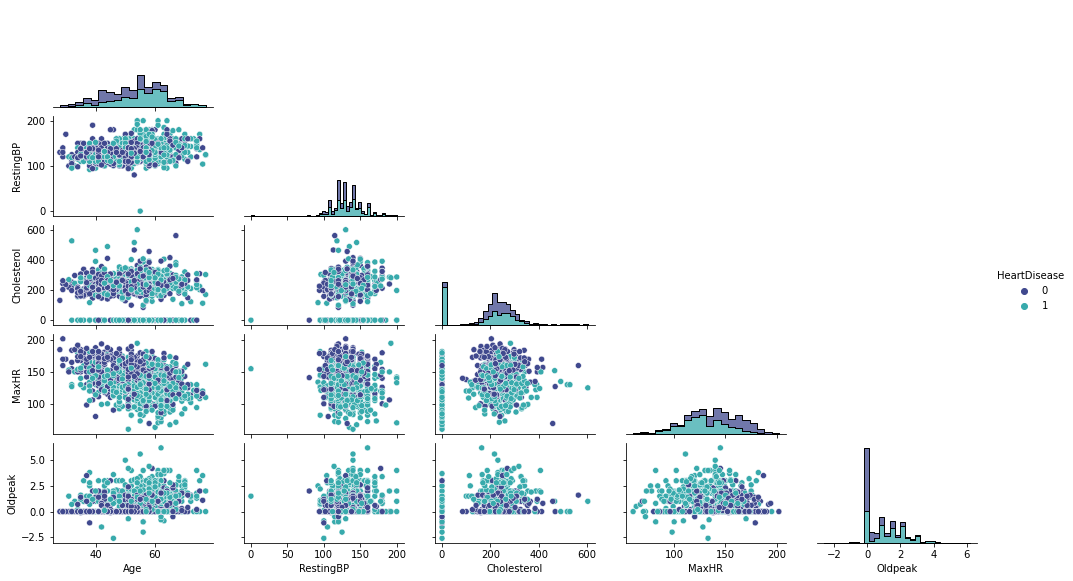

In [50]:
data_comparison = data_heart.loc[ : ,numeric_data]
data_comparison["HeartDisease"]= data_heart["HeartDisease"]
g = sns.PairGrid(data_comparison, hue="HeartDisease" , corner=True, palette = "mako")
g.map_diag(sns.histplot, multiple="stack", element="step", color=".3", palette = "mako")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.gcf().set_size_inches(15, 8)

We can clearly see for the age paremater below the mean is highier for patiance who has the heart disease

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

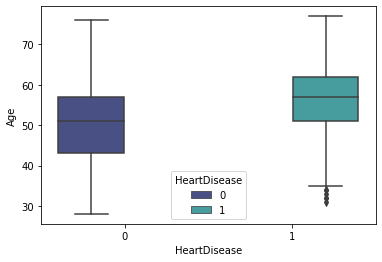

In [51]:
sns.boxplot(data=data_heart, y="Age",x="HeartDisease",  hue="HeartDisease", palette = "mako" )

we do not see high correlation in between variables

sns.histplot(data=data_heart, x="Age")

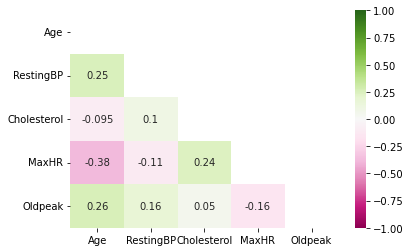

In [52]:
# correlation matrix
data_comparison = data_heart.loc[ : ,numeric_data]
data_comparison["HeartDisease"]= data_heart["HeartDisease"]
matrix = data_heart.loc[ : ,numeric_data].corr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(data_heart.loc[ : ,numeric_data].corr(),annot=True, vmax=1, vmin=-1, center=0, cmap='PiYG', mask=mask)
plt.show()

**4.5b Outliers Detection** <br>
I noticed some outliers, these outliers needs further investigation to see if we need to remove them.

<AxesSubplot:xlabel='Cholesterol'>

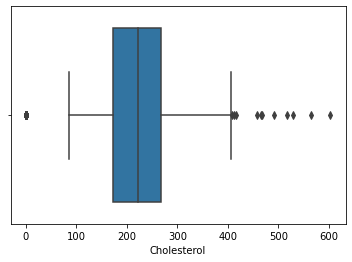

In [53]:
sns.boxplot(x=data_heart.Cholesterol)

<AxesSubplot:>

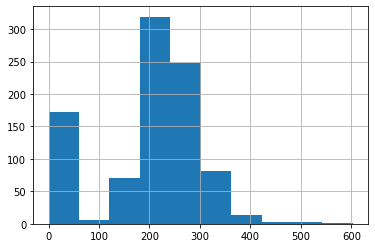

In [54]:
data_heart["Cholesterol"].hist()

In [55]:
from scipy import stats
z = np.abs(stats.zscore(data_heart["Cholesterol"]))

threshold = 3
print("##########")
print(np.where(z > 3))


##########
(array([ 76, 149, 616], dtype=int64),)


<AxesSubplot:xlabel='Oldpeak'>

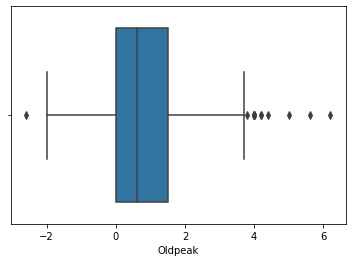

In [56]:
sns.boxplot(x=data_heart.Oldpeak)

In [57]:
from scipy import stats
z_2 = np.abs(stats.zscore(data_heart["Oldpeak"]))

threshold = 3
print("##########")
print(np.where(z_2 > 3))

##########
(array([166, 324, 702, 771, 791, 850, 900], dtype=int64),)


In [58]:
q_low = data_heart["Oldpeak"].quantile(0.01)
q_hi  = data_heart["Oldpeak"].quantile(0.99)

df_filtered = data_heart[(data_heart["Oldpeak"] < q_hi) & (data_heart["Oldpeak"] > q_low)]
q_hi

4.0

**4.5c Categorical Data Summary**

reviwing the categoerical data
- we see that our data we have more patiance that does not have a heart failure so when we are creating our model we need to split accordingly so that we do not have bias.
- We can identify some of the classifications by just reviewing the plots below, for example, there is not a clear difference in restingesg in between heart disease and not hear disease butin the ST_slope: we see a big number of patient who has  heart desiase have a ST slope flat because of the difference you can easily tell.

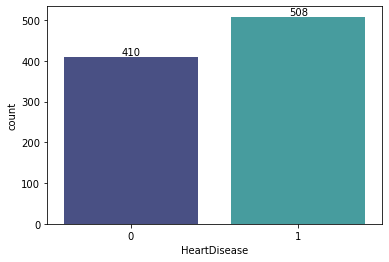

In [59]:
ax = sns.countplot(x="HeartDisease", data=data_heart,palette = "mako")
for container in ax.containers:
        ax.bar_label(container)
    
plt.show()

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']


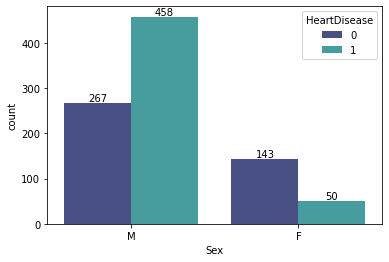

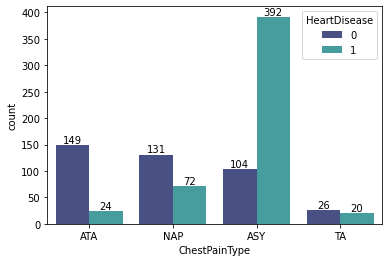

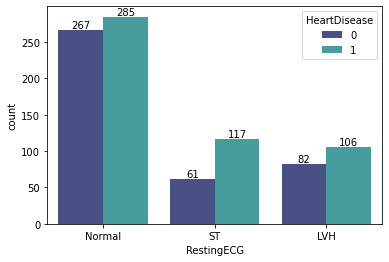

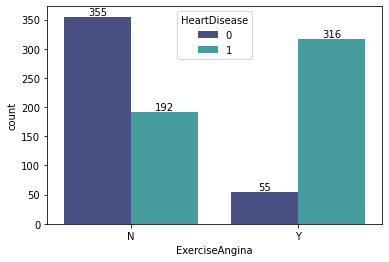

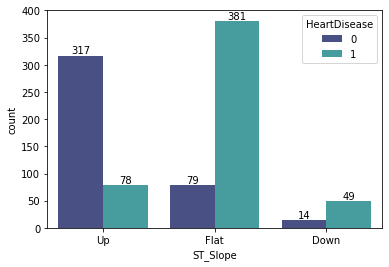

In [60]:
# we need to combine categorical data and binary data to review 
category_data_joined = categ_data + binary_data
print(category_data_joined)
for f in categ_data:
    ax = sns.countplot(x = f, data = data_heart.loc[ : ,category_data_joined], hue = 'HeartDisease', palette = "mako")
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.show()

---

### **5. Transforming the Categorical Variables: Creatinging Dummy Variables** <br>
In this section we will transfer our categorical data to dummy variables. We already have some binary data we just need to transform the rest of it. 
I did not want to use to pandas dummy variable builtin function because of the "dummy variable trap". It made my code very messy therefore I decided to transfrom them one by using my own function.

In [61]:
print("we need to transform these below three columns", categ_data)


def transformCatData(colname, data):
    le = LabelEncoder()

    def transformCate(colname, df):
        new_col_name = colname+"_nu"
        df_new = pd.DataFrame(le.fit_transform(df[colname].values), columns =[new_col_name])
        merged= pd.concat([df, df_new], axis="columns")
        del merged[colname]
        return merged

    for i in range(len(categ_data)):
        if i == 0:
            data_transformed= transformCate(colname=categ_data[i] , df= data)
        else:
            data_transformed= transformCate(colname=categ_data[i],df= data_transformed)
    return  data_transformed        
        
data_transformed =  transformCatData(colname=categ_data,data= data_heart) 
print("original order", data_transformed.columns)
# changing the order
data_transformed =  data_transformed[['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'Sex_nu',
 'ChestPainType_nu',
 'RestingECG_nu',
 'ExerciseAngina_nu',
 'ST_Slope_nu',
 'HeartDisease',]]

print(len(data_heart.columns.tolist()))
print("new order, ", data_heart.columns.tolist())

we need to transform these below three columns ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
original order Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_nu', 'ChestPainType_nu', 'RestingECG_nu',
       'ExerciseAngina_nu', 'ST_Slope_nu'],
      dtype='object')
12
new order,  ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


---

### **6-Split Training and Test Datasets**

In [74]:
x = data_transformed.iloc[ : , :11]
#print("**** x ***")
print(x.head())
y=data_transformed.loc[ : ,"HeartDisease"]
print("**** y***")
#print(y.head())

x_train,x_test,y_train, y_test = train_test_split(x, y, 
                                                  test_size=0.5,
                                                  random_state=11, 
                                                  stratify=y, shuffle=True)


print(x_train.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_nu  \
0   40        140          289          0    172      0.0       1   
1   49        160          180          0    156      1.0       0   
2   37        130          283          0     98      0.0       1   
3   48        138          214          0    108      1.5       0   
4   54        150          195          0    122      0.0       1   

   ChestPainType_nu  RestingECG_nu  ExerciseAngina_nu  ST_Slope_nu  
0                 1              1                  0            2  
1                 2              1                  0            1  
2                 1              2                  0            2  
3                 0              1                  1            1  
4                 2              1                  0            2  
**** y***
     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  Sex_nu  \
506   75        136          225          0    112      3.0       1   
576   62        139

---

### **7- Creating Logistic Regression Model and Fitting our Data**<br>

In [63]:
log_reg_classifier = LogisticRegression(solver='lbfgs', max_iter=1000) # intiate the log reg
log_reg_classifier.fit(x_train,y_train)# fit the training data to train the data
y_pred = log_reg_classifier.predict(x_test) # use test data to predict
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8562091503267973

Since I did a lot of manual data preparation. I want to check to see if I can use create a piplene to do all these manual steps
I also wanted to compare my results so that if I made any mistake i should have two very different accuracy result.

in the below code I used sklearn processor pipline. I created new data split fromt the original data.
This pipeline eliminates dummy variable process

---

### **8- Feature Selection**<br>
Before evaluating our model I want evaluate the some of the features that are not very important for my model.
first we check coef values of each features and plot

{'Age': 0.8583877995642701, 'RestingBP': 0.8605664488017429, 'Cholesterol': 0.8518518518518519, 'FastingBS': 0.8562091503267973, 'MaxHR': 0.8758169934640523, 'Oldpeak': 0.8518518518518519, 'Sex_nu': 0.8540305010893247, 'ChestPainType_nu': 0.8649237472766884, 'RestingECG_nu': 0.8583877995642701, 'ExerciseAngina_nu': 0.8605664488017429, 'ST_Slope_nu': 0.8366013071895425}
max effect 
feature MaxHR
accuracy score  0.8758169934640523
when we drop it the accurasy score went down effect
feature ST_Slope_nu
accuracy score  0.8366013071895425


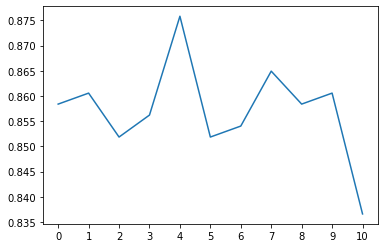

In [64]:
def dropFeatureAccr(x_train,x_test, y_train, y_test):
    accuracy_featuresDrop = []
    column_name= list(x_train.columns.values.tolist())
    for column in range(len(column_name)):
        x_train_modified = x_train.drop(columns=[column_name[column]])
        x_test_modified = x_test.drop(columns=[column_name[column]])
        log_reg_classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
        log_reg_classifier.fit(x_train_modified,y_train)
        y_pred_mod = log_reg_classifier.predict(x_test_modified)
        accuracy_featuresDrop.append(accuracy_score(y_test,y_pred_mod))      
    dictionary_feature_drop = dict(zip(column_name, accuracy_featuresDrop))        
    return dictionary_feature_drop

logisticRegDrop =dropFeatureAccr(x_train= x_train,y_train= y_train, x_test= x_test, y_test = y_test) 
print(logisticRegDrop)
print("max effect ")
print("feature", max(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(max(logisticRegDrop, key=logisticRegDrop.get)))
print("when we drop it the accurasy score went down effect")
print("feature",min(logisticRegDrop, key=logisticRegDrop.get))
print("accuracy score ", logisticRegDrop.get(min(logisticRegDrop, key=logisticRegDrop.get)))


lists = logisticRegDrop.items() # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.xticks(x,[0,1,2,3,4,5,6,7,8,9,10])
plt.show()


In [65]:
n = pd.DataFrame.from_dict(logisticRegDrop,orient='index' ).sort_values(by=0)
n

,0
ST_Slope_nu,0.836601
Cholesterol,0.851852
Oldpeak,0.851852
Sex_nu,0.854031
FastingBS,0.856209
Age,0.858388
RestingECG_nu,0.858388
RestingBP,0.860566
ExerciseAngina_nu,0.860566
ChestPainType_nu,0.864924


we see in our graph whem we drop our **MaxHR** we see that our accuracy goes up
we also see that  our most important our value is the **ST_Slope** , we need to make sure that we keep this value in our model and we can also do a more research on the ST_Slope too

we will work on the train data set 
we will split our data set to two ( one with the Heart Disease and with no heart disease to compare them)
first we will examine the numeric data and then not numeric data

### **9-Final Model with Selected Parameters**<br>

In [66]:
x_train_modified = x_train.drop(columns=["MaxHR", "ChestPainType_nu", "RestingECG_nu"])
x_test_modified = x_test.drop(columns=["MaxHR", "ChestPainType_nu", "RestingECG_nu"])
log_reg_classifier.fit(x_train_modified,y_train)# fit the training data to train the data
y_pred_mod = log_reg_classifier.predict(x_test_modified) # use test data to predict
accuracy = accuracy_score(y_test, y_pred_mod)
accuracy

0.8823529411764706

---

### **10- Evaluate the Model**<br>

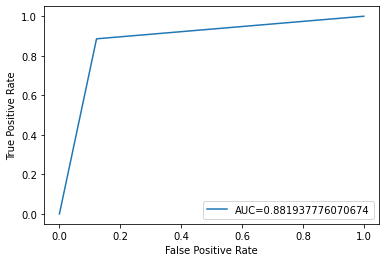

In [67]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_mod)
auc = metrics.roc_auc_score(y_test, y_pred_mod)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

The Area Under the Curve (AUC) is high therefore our model did well. 

In [68]:
print('Log loss = {:.5f}'.format(log_loss(y_test, y_pred_mod)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, y_pred_mod)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, y_pred_mod)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred_mod)))
print('Precision = {:.5f}'.format(precision_score(y_test, y_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, y_pred_mod)))

print('F1 score = {:.5f}'.format(f1_score(y_test, y_pred_mod)))

print('\nClassification Report')
print(classification_report(y_test, y_pred_mod))


Log loss = 4.06343
AUC = 0.88194
Average Precision = 0.86042

Using 0.5 as threshold:
Accuracy = 0.88235
Precision = 0.88211
Recall = 0.88583
F1 score = 0.89286

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       205
           1       0.90      0.89      0.89       254

    accuracy                           0.88       459
   macro avg       0.88      0.88      0.88       459
weighted avg       0.88      0.88      0.88       459



180 25 29 225


<AxesSubplot:>

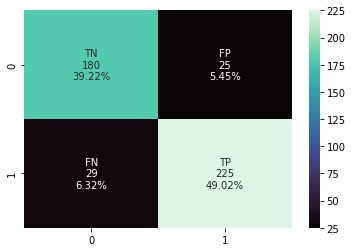

In [69]:
cm = confusion_matrix(y_test, y_pred_mod)
TN_log, FP_log, FN_log, TP_log = cm.ravel()
print(TN_log, FP_log, FN_log, TP_log)
group_names = ["TN","FP","FN","TP"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='mako')

In [70]:
TPR_log = TP_log/(TP_log + FN_log)
TNR_log = TN_log /(TN_log + FP_log)

my_accuracy_score_log= accuracy_score(y_test, y_pred_mod)
my_matrix_values_1 = {"TN":TN_log, "FP":FP_log, "FN":FN_log, "TP":TP_log,"Accuracy":my_accuracy_score_log,
                      "TPR":TPR_log,"TNR":TNR_log}
result = pd.DataFrame(my_matrix_values_1 , index=[0])
print(result)

    TN  FP  FN   TP  Accuracy       TPR       TNR
0  180  25  29  225  0.882353  0.885827  0.878049


our TNR (finding patient that who does have a heart failure) and TPR (finding patient that does have a heart failure)scores are very close, also our over all accuracy is very close. Over all our model did a pretty good job but we can still improve our model by trying some other technics. 

Our TNR and TPR scores are very close, also our overall accuracy is very close. Overall our model did a pretty good job but we can still improve our model by trying some other technics, like removing some outliers or eliminating more irrelavant features.
I also want to show that we can also add our prediction for each data points. Please see example below. 

In [71]:
test_prob = log_reg_classifier.predict_proba(x_test_modified)[:, 1] # probabilty
test_pred = log_reg_classifier.predict(x_test_modified)#target = values
print(test_prob[0])
print(test_pred[0])

0.8321832370727031
1


the below results gives us the odd ratio for our each feature. For example sex, for male (sex=1) to the odds of having heart disease for females is exp(1.215323). You can derive it based on the logistic regression equation.

In [72]:
coefficients = np.hstack((log_reg_classifier.intercept_, log_reg_classifier.coef_[0]))
print(len(coefficients))
print(x_train.columns.values.tolist())
pd.DataFrame(data={'variable': ['intercept'] + x_train_modified.columns.values.tolist(), 'coefficient': coefficients})

9
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_nu', 'ChestPainType_nu', 'RestingECG_nu', 'ExerciseAngina_nu', 'ST_Slope_nu']


,variable,coefficient
0,intercept,-0.051918
1,Age,0.021428
2,RestingBP,0.002181
3,Cholesterol,-0.002316
4,FastingBS,0.795913
5,Oldpeak,0.233080
6,Sex_nu,1.215323
7,ExerciseAngina_nu,1.146983
8,ST_Slope_nu,-1.755557
